In [75]:
# %load adj_functions.sage
import numpy as np
from numpy import linalg

################################################################################
# Function: idempotents                                                        #
#                                                                              #
# Purpose: find principal idempotents of a Hermitian matrix                    #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#                                                                              #
# Returns: principal idempotents, eigenvalues                                  #
#                                                                              #
################################################################################

def idempotents(A):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    # Extracts eigenvalues and eigenvectors
    W,V = linalg.eigh(A)
    # Converts eigenvectors into orthonormal basis
    Q, R = linalg.qr(V) 
    Q = matrix(Q)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    idems = []
    evals = []
    i = 0
    j = 0
    while i < n:
        # Zero matrix
        E = matrix(n, n, 0)
        # Checks if eigenvectors share an eigenvalue
        while j < n and abs(W[i] - W[j]) < 0.01:
            # Converts eigenvector into column vecror
            v = Q.column(j).column()
            # updates idempotent
            E = E + v*v.conjugate_transpose();
            j = j + 1
        E = E
        idems.append(E)
        evals.append(W[i].round(3))
        i = j
    return idems, evals

################################################################################
# Function: transfer                                                           #
#                                                                              #
# Purpose: return transfer matrix U(t) given adjacency matrix/Hamiltonian      #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   t        float                              time                           #
#   k        integer                            rounding accuracy              #
#                                                                              #
# Returns: transfer U(t)                                                       #
#                                                                              #
################################################################################

def transfer(A, t):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    idems, evals = idempotents(A)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    # Zero matrix
    U = matrix(n, n, 0)
    for i in range(len(idems)):
        # Updates transder matrix
        U = U + exp(-I*t*evals[i])*idems[i]
    return U
#     A = matrix(A)
#     return matrix(exp(-1*I*t*A))

################################################################################
# Function: transfer_at_time_r                                                 #
#                                                                              #
# Purpose: find real part of transfer matrix at specific time and index        #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: real part of U(t) at index [i][j]                                   #
#                                                                              #
################################################################################

def transfer_at_time_r(A,t,i,j):
    U = transfer(A,t)
    if abs(U[i][j].real()) < 0.00001:
        return 0
    return U[i][j].real()

################################################################################
# Function: transfer_at_time_i                                                 #
#                                                                              #
# Purpose: find imaginary part of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: imaginary part of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_i(A,t,i,j):
    U = transfer(A,t)
    if abs(U[i][j].imag()) < 0.00001:
        return 0
    return U[i][j].imag()

################################################################################
# Function: transfer_at_time_a                                                 #
#                                                                              #
# Purpose: find absolute value of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: absolute value of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_a(A,t,i,j):
    U = transfer(A,t)
    if U[i][j].abs() < 0.00001:
        return 0
    return U[i][j].abs()
    
################################################################################
# Function: parallel                                                           #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are parallel                               #
#                                                                              #
################################################################################

def parallel(a,b,idems):
    for M in idems:
        va = M[a].conjugate()
        vb = M[b]
        anorm=np.sqrt(M[a].dot_product(va))
        bnorm=np.sqrt(M[b].dot_product(M[b].conjugate()))
        if abs(abs(va.dot_product(vb))-anorm*bnorm)>0.0001:
            return False
    return True
    
################################################################################
# Function: cospec                                                             #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are cospectral                             #
#                                                                              #
################################################################################

def cospec(a,b,idems):
    for M in idems:
        if abs(M[a,a]- M[b,b])>0.001:
            return False
    return True

################################################################################
# Function: strcospec                                                          #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are strongly cospectral                    #
#                                                                              #
################################################################################

def strcospec(a,b,idems):
    if cospec(a,b,idems) and parallel(a,b,idems):
        return True
    return False

In [79]:
K3 = np.matrix([[0, -1j, 1j],[1j, 0, -1j],[-1j, 1j, 0]])
K3=matrix(K3)

C4 = np.matrix([[0, -1j, 0, 1j],[1j, 0, -1j, 0],[0, 1j, 0, -1j],[-1j, 0, 1j, 0]])
C4 = matrix(C4) 

C4

[   0.0 -1.0*I    0.0  1.0*I]
[ 1.0*I    0.0 -1.0*I    0.0]
[   0.0  1.0*I    0.0 -1.0*I]
[-1.0*I    0.0  1.0*I    0.0]

In [104]:
W = K3.tensor_product(identity_matrix(4))+identity_matrix(3).tensor_product(C4)
W.round(3)

[   0.0 -1.0*I    0.0  1.0*I -1.0*I    0.0    0.0    0.0  1.0*I    0.0    0.0    0.0]
[ 1.0*I    0.0 -1.0*I    0.0    0.0 -1.0*I    0.0    0.0    0.0  1.0*I    0.0    0.0]
[   0.0  1.0*I    0.0 -1.0*I    0.0    0.0 -1.0*I    0.0    0.0    0.0  1.0*I    0.0]
[-1.0*I    0.0  1.0*I    0.0    0.0    0.0    0.0 -1.0*I    0.0    0.0    0.0  1.0*I]
[ 1.0*I    0.0    0.0    0.0    0.0 -1.0*I    0.0  1.0*I -1.0*I    0.0    0.0    0.0]
[   0.0  1.0*I    0.0    0.0  1.0*I    0.0 -1.0*I    0.0    0.0 -1.0*I    0.0    0.0]
[   0.0    0.0  1.0*I    0.0    0.0  1.0*I    0.0 -1.0*I    0.0    0.0 -1.0*I    0.0]
[   0.0    0.0    0.0  1.0*I -1.0*I    0.0  1.0*I    0.0    0.0    0.0    0.0 -1.0*I]
[-1.0*I    0.0    0.0    0.0  1.0*I    0.0    0.0    0.0    0.0 -1.0*I    0.0  1.0*I]
[   0.0 -1.0*I    0.0    0.0    0.0  1.0*I    0.0    0.0  1.0*I    0.0 -1.0*I    0.0]
[   0.0    0.0 -1.0*I    0.0    0.0    0.0  1.0*I    0.0    0.0  1.0*I    0.0 -1.0*I]
[   0.0    0.0    0.0 -1.0*I    0.0    0.0    0.0  1.0

In [81]:
PL01=plot(transfer_at_time_a(W,x,0,1),0,1000*np.pi)
PL02=plot(transfer_at_time_a(W,x,0,2),0,1000*np.pi)
PL03=plot(transfer_at_time_a(W,x,0,3),0,100*np.pi)


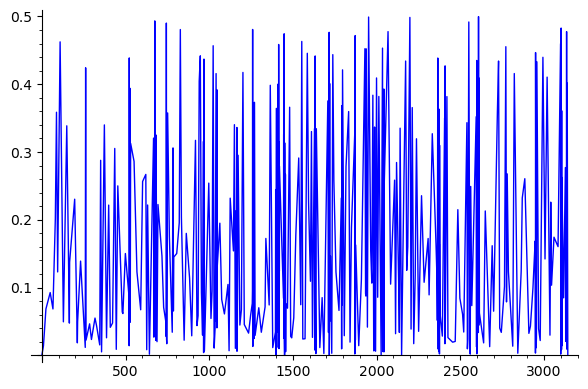

In [82]:
PL01

In [83]:
PL01.get_minmax_data()

{'xmin': 0.0,
 'xmax': 3141.592653589793,
 'ymin': 9.755760763043259e-17,
 'ymax': 0.49972287879317134}

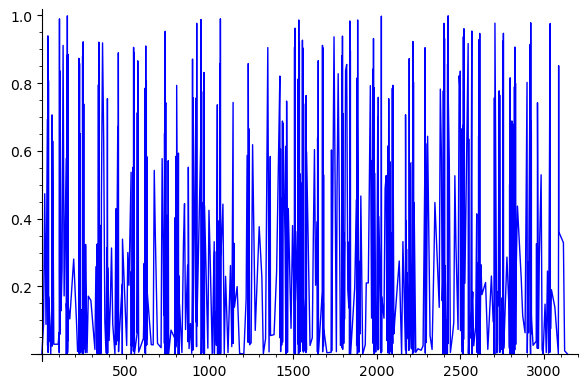

In [84]:
PL02


In [85]:
PL02.get_minmax_data()

{'xmin': 0.0,
 'xmax': 3141.592653589793,
 'ymin': 5.698642840029056e-17,
 'ymax': 0.9985197031167459}

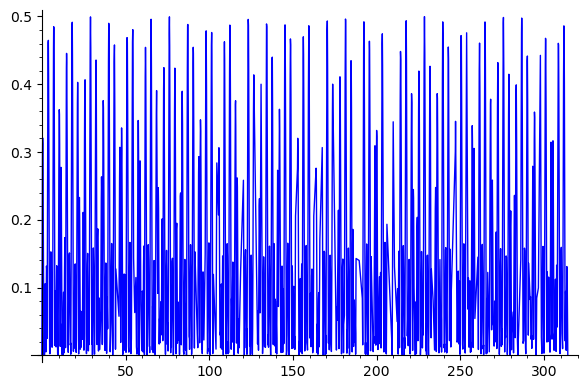

In [86]:
PL03

In [87]:
PL03.get_minmax_data()

{'xmin': 0.0,
 'xmax': 314.1592653589793,
 'ymin': 9.81283240642016e-17,
 'ymax': 0.49979008566876565}

In [88]:
################################################################################
# Function: sxyu                                                               #
#                                                                              #
# Purpose: calculate sigma_x^u or sigma_y^u                                    #
#                                                                              #
# Arguments:                                                                   #
#   u        integer     index for Pauli matrix                                # 
#   n        integer     total number of matrices                              # 
#   s        character   x or y to choose Pauli matrix                         # 
#                                                                              #
# Returns: matrix sigma_s^u                                                    #
#                                                                              #
################################################################################

def sxyu(u,n,s):
    # Sanity check
    if u > n-1:
        print("Invalid input: u > n-1")
        return
    # Pauli matrices
    SX = matrix([[0,1],[1,0]])
    SY = matrix([[0,-I],[I,0]])
    # Identity
    I2 = matrix([[1,0],[0,1]])
    # Choose which Pauli matrix to use
    S = SX if s == 'x' else SY
    # Compute tensor products
    j = 1
    if u == 0:
        M = S
        while j < n:
            M = M.tensor_product(I2)
            j += 1
    else:
        M = I2
        j = j + 1
        while j <= u:
            M = M.tensor_product(I2)
            j += 1
        M = M.tensor_product(S)
        while j < n:
            M = M.tensor_product(I2)
            j += j
    return M

In [108]:
K3 = np.matrix([[0, -1j, 1j],[1j, 0, -1j],[-1j, 1j, 0]])
K3=matrix(K3)

C4 = np.matrix([[0, -1j, 0, 1j],[1j, 0, -1j, 0],[0, 1j, 0, -1j],[-1j, 0, 1j, 0]])
C4 = matrix(C4) 

C4
W = K3.tensor_product(identity_matrix(4))+identity_matrix(3).tensor_product(C4)
W.round(3)

J4 = np. matrix([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
J4 = matrix(J4)
S = np.matrix([[0,-1j],[1j,0]])
S = matrix(S)
Y = identity_matrix(2).tensor_product(C4)+S.tensor_product(J4)
Y

[   0.0 -1.0*I    0.0  1.0*I -1.0*I -1.0*I -1.0*I -1.0*I]
[ 1.0*I    0.0 -1.0*I    0.0 -1.0*I -1.0*I -1.0*I -1.0*I]
[   0.0  1.0*I    0.0 -1.0*I -1.0*I -1.0*I -1.0*I -1.0*I]
[-1.0*I    0.0  1.0*I    0.0 -1.0*I -1.0*I -1.0*I -1.0*I]
[ 1.0*I  1.0*I  1.0*I  1.0*I    0.0 -1.0*I    0.0  1.0*I]
[ 1.0*I  1.0*I  1.0*I  1.0*I  1.0*I    0.0 -1.0*I    0.0]
[ 1.0*I  1.0*I  1.0*I  1.0*I    0.0  1.0*I    0.0 -1.0*I]
[ 1.0*I  1.0*I  1.0*I  1.0*I -1.0*I    0.0  1.0*I    0.0]

In [120]:
PK01=plot(transfer_at_time_a(Y,x,0,1),0,100*np.pi)
PK02=plot(transfer_at_time_a(Y,x,0,2),0,100*np.pi)
PK03=plot(transfer_at_time_a(Y,x,0,3),0,100*np.pi)
PK05=plot(transfer_at_time_a(Y,x,0,5),0,100*np.pi)
PK06=plot(transfer_at_time_a(Y,x,0,6),0,100*np.pi)


In [123]:
idempotents(Y)

([
[                            0.12499999999999967   0.12499999999999992 - 6.378500613402825e-17*I   0.12499999999999992 - 4.579436337827669e-17*I     0.12499999999999992 + 9.2523305601008e-17*I  1.2025669923898333e-17 + 0.12499999999999978*I    7.119130990511545e-18 + 0.1249999999999998*I   7.119130990511545e-18 + 0.12499999999999978*I    7.119130990511545e-18 + 0.1249999999999998*I]  [                               0.24999999999999986     1.2625580207802679e-16 + 0.24999999999999997*I     -0.24999999999999986 + 2.882565778017279e-17*I                    1.0824732090825653e-16 - 0.25*I  2.7755575615628914e-17 + 1.5959455978986625e-16*I  2.7755575615628914e-17 + 1.1102230246251565e-16*I  -8.326672684688674e-17 + 1.1622647289044608e-16*I   -6.071532165918825e-17 + 1.249000902703301e-16*I]  [                                0.2499999999999999      -0.25000000000000006 + 5.78923162379189e-17*I      0.24999999999999994 + 7.170264644674956e-17*I      -0.2499999999999998 - 1.797990008624073e

In [125]:
f = Y.charpoly()
f
##x^8 - 24.0*x^6 + 144.0*x^4 - 256.0*x^2
##0 of order 2, pm 2 of order 2, pm 4 of order 1

x^8 - 24.0*x^6 + 144.0*x^4 - 256.0*x^2

In [121]:
PK05.get_minmax_data()

{'xmin': 0.0,
 'xmax': 314.1592653589793,
 'ymin': 1.8460687268741311e-16,
 'ymax': 0.24999996194920773}

In [122]:
PK06.get_minmax_data()

{'xmin': 0.0,
 'xmax': 314.1592653589793,
 'ymin': 1.6637230117397568e-16,
 'ymax': 0.24999997065461252}